# Overall Result visualization - After computing AUC of data 

In [2]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
from nwbwidgets.allen import AllenRasterWidget
from nwbwidgets.allen import AllenPSTHWidget
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from plot import *

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 10)  # Show all columns

#### Load the file ####

mouse_name = 'AB087_20231017_141901'
df = pd.read_parquet(f'{mouse_name}_AUC_Selectivity.parquet')

In [6]:
df['ccf_parent_name'].unique()

array(['Striatum dorsal region',
       'Primary somatosensory area, barrel field', 'Primary motor area',
       'Secondary motor area', "Ammon's horn", 'ventricular systems',
       'Dorsal auditory area'], dtype=object)

## 1) Boxplot

Let's start by looking at the distribution of selectivity.

In [4]:
### Parent acronym is more interesting as it regroups the main neuron regions in the brain 
print(df["ccf_acronym"].unique())
print(df["ccf_parent_acronym"].unique())

['CP' 'SSp-bfd6b' 'SSp-bfd6a' 'SSp-bfd5' 'SSp-bfd4' 'SSp-bfd2/3'
 'SSp-bfd1' 'MOp6b' 'MOp6a' 'MOp5' 'MOs5' 'MOs2/3' 'CA3' 'VL' 'AUDd6b'
 'AUDd6a' 'AUDd5' 'AUDd4' 'AUDd2/3' 'AUDd1']
['STRd' 'SSp-bfd' 'MOp' 'MOs' 'CA' 'VS' 'AUDd']


### 1 - Overall comparisons

#### 1a) Whisker pre/post stimuli

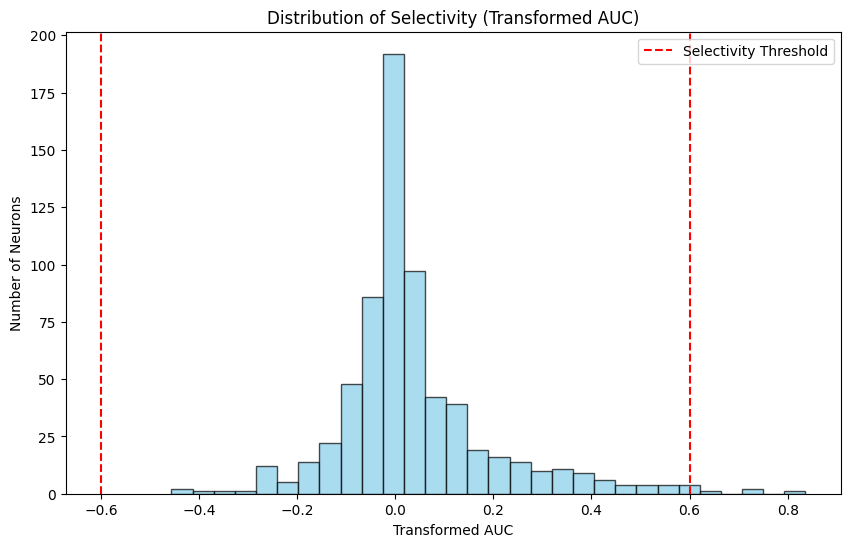

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["category"]=="whisker"]['Transformed AUC'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0.6, color='red', linestyle='--', label='Selectivity Threshold')
plt.axvline(x=-0.6, color='red', linestyle='--')
plt.xlabel("Transformed AUC")
plt.ylabel("Number of Neurons")
plt.title("Distribution of Selectivity (Transformed AUC)")
plt.legend()
plt.show()

#### 1b) Auditory pre/post Stimuli

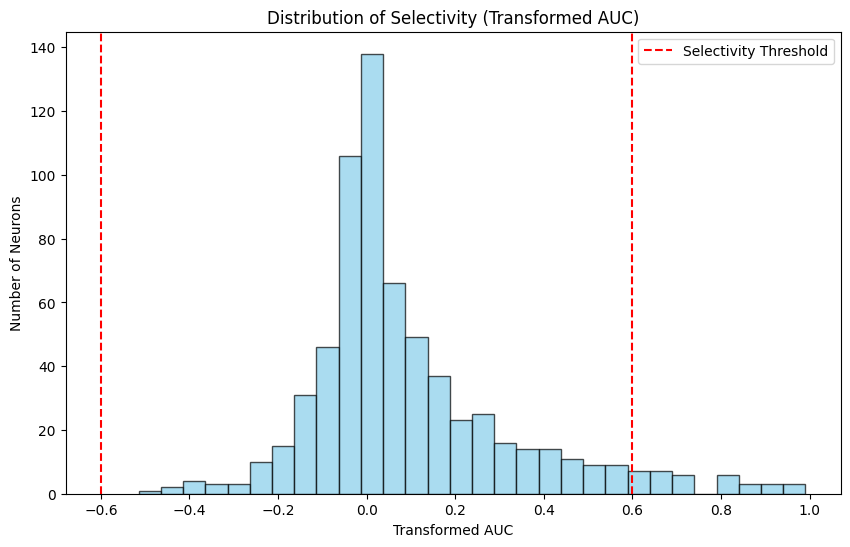

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["category"]=="auditory"]['Transformed AUC'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0.6, color='red', linestyle='--', label='Selectivity Threshold')
plt.axvline(x=-0.6, color='red', linestyle='--')
plt.xlabel("Transformed AUC")
plt.ylabel("Number of Neurons")
plt.title("Distribution of Selectivity (Transformed AUC)")
plt.legend()
plt.show()

#### 1c) Whisker vs Auditory post stimuli

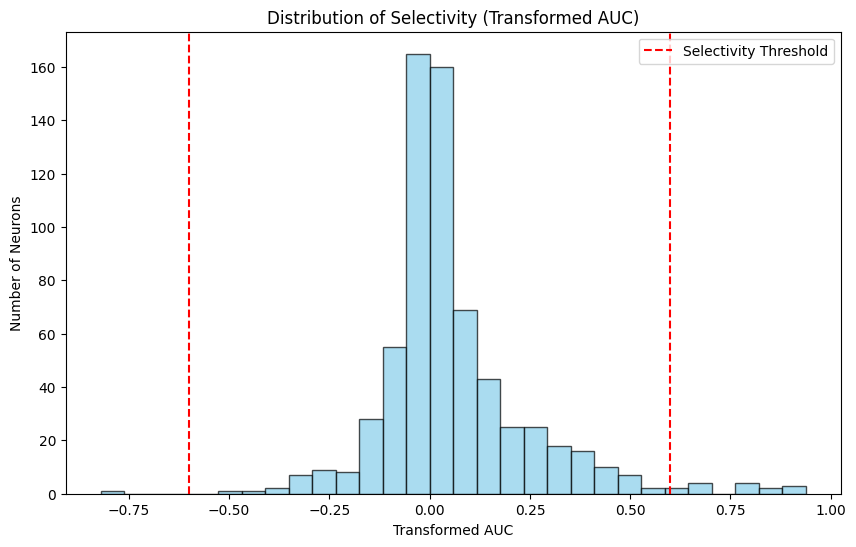

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["category"]=="wh/aud"]['Transformed AUC'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0.6, color='red', linestyle='--', label='Selectivity Threshold')
plt.axvline(x=-0.6, color='red', linestyle='--')
plt.xlabel("Transformed AUC")
plt.ylabel("Number of Neurons")
plt.title("Distribution of Selectivity (Transformed AUC)")
plt.legend()
plt.show()

### 1 - Comparisons per neuron group (CCF region & CCF parent region)

In [ ]:
region_data = df[(df['ccf_acronym'] == "SSp-bfd6a") & (df['category'] == "wh/aud")]
region_data

,id,cluster_id,firing_rate,ccf_acronym,ccf_name,ccf_parent_acronym,ccf_parent_name,spike_times,pre_spikes,post_spikes,pre,post,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,category
1360,102,122,19.456979,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[2.58863334e-01 2.61363302e-01 2.02710724e+00 ...,None,None,0.2,0.2,0.587552,0.175105,0.997,0.003,True,negative,Aud/Wh
1361,108,129,14.181142,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[ 17.83443708 23.39869879 24.04399048 ......,None,None,0.2,0.2,0.375566,-0.248869,0.000,1.000,True,positive,Aud/Wh
1362,109,130,1.996417,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[1.64997876e-02 1.19765125e-01 3.86395026e-01 ...,None,None,0.2,0.2,0.553317,0.106634,0.987,0.013,True,negative,Aud/Wh
1363,110,132,1.687859,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[ 49.73619308 80.25320023 81.77718061 ......,None,None,0.2,0.2,0.470716,-0.058567,0.078,0.926,False,none,Aud/Wh
1364,111,133,6.044678,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[8.72322104e-01 9.75454110e-01 1.21205106e+00 ...,None,None,0.2,0.2,0.547469,0.094937,0.945,0.055,False,none,Aud/Wh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,653,865,0.202041,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[ 58.41698133 58.42578121 332.68831728 ......,None,None,0.2,0.2,0.502839,0.005677,0.783,0.492,False,none,Aud/Wh
1528,691,909,0.345561,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[ 17.71930523 38.59083655 38.60296973 ......,None,None,0.2,0.2,0.503052,0.006104,0.777,0.245,False,none,Aud/Wh
1529,694,912,0.134230,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[1468.91002393 2240.05233029 2436.35793656 244...,None,None,0.2,0.2,0.495475,-0.009050,0.443,1.000,False,none,Aud/Wh
1530,695,913,0.108220,SSp-bfd6a,"Primary somatosensory area, barrel field, laye...",SSp-bfd,"Primary somatosensory area, barrel field",[1214.91622695 1467.78237178 1623.49570061 184...,None,None,0.2,0.2,0.502455,0.004909,0.894,0.514,False,none,Aud/Wh


In [ ]:
columns = ["ccf_acronym", "ccf_parent_acronym"]
categories = ["whisker", "auditory", "wh/aud"]

for column in columns:
    for category in categories:
        barplots_specific(df, column_name = column, category_name = category, show = False)

In [2]:
df
# enlever spike_times 

,cluster_id,firing_rate,ccf_acronym,ccf_name,ccf_parent_acronym,ccf_parent_name,spike_times,pre_spikes,post_spikes,pre,post,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,category
0,24,5.23202211,CP,Caudoputamen,STRd,Striatum dorsal region,"[73.00296022688578, 122.6238881192645, 123.347...","[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, ...",0.2,0.2,0.454557,-0.090887,0.044,0.956,True,positive,Whisker
1,25,5.76491612,CP,Caudoputamen,STRd,Striatum dorsal region,"[229.96313966558003, 290.42996127120983, 379.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.2,0.2,0.492639,-0.014721,0.367,0.633,False,none,Whisker
2,29,6.77512338,CP,Caudoputamen,STRd,Striatum dorsal region,"[0.08623222325882751, 0.11309854407313558, 0.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.2,0.2,0.489527,-0.020946,0.344,0.656,False,none,Whisker
3,34,6.81893773,CP,Caudoputamen,STRd,Striatum dorsal region,"[5.373597491903975, 76.23618527198039, 78.5035...","[4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[10, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,...",0.2,0.2,0.531254,0.062509,0.878,0.122,False,none,Whisker
4,36,10.00267753,CP,Caudoputamen,STRd,Striatum dorsal region,"[56.83066841412906, 185.56121125525817, 220.65...","[0, 0, 0, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 1, 2, 1, 1, ...",0.2,0.2,0.366362,-0.267275,0.000,1.000,True,positive,Whisker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,380,0.90787034,AUDd1,"Dorsal auditory area, layer 1",AUDd,Dorsal auditory area,"[4.2703775486795035, 15.825795480057478, 35.99...",None,None,0.2,0.2,0.595855,0.191710,1.000,0.000,True,negative,Aud/Wh
1997,390,0.21241441,AUDd2/3,"Dorsal auditory area, layer 2/3",AUDd,Dorsal auditory area,"[58.78164282944423, 93.61606130959744, 114.171...",None,None,0.2,0.2,0.505421,0.010843,0.645,0.442,False,none,Aud/Wh
1998,391,0.2720205,AUDd2/3,"Dorsal auditory area, layer 2/3",AUDd,Dorsal auditory area,"[36.2325329003554, 82.22754108075738, 91.31705...",None,None,0.2,0.2,0.534598,0.069197,0.958,0.046,True,negative,Aud/Wh
1999,395,0.18098575,CA3,Field CA3,CA,Ammon's horn,"[23.57766343702013, 23.947591678035838, 33.696...",None,None,0.2,0.2,0.512081,0.024161,0.957,0.149,False,none,Aud/Wh


## 2) Bar plots with number of selective neurons 

### 2a) Total selective neurons for whisker stimuli

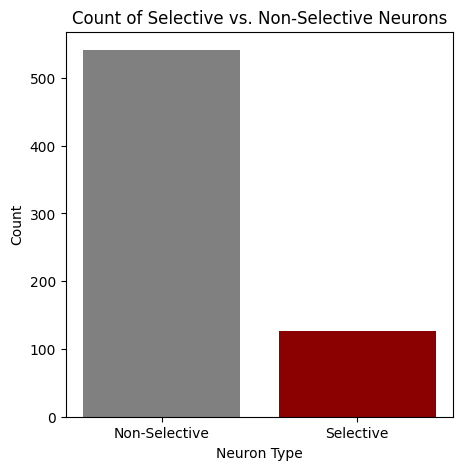

In [27]:
# Count selective and non-selective neurons
counts = df['selective'].value_counts()

# Plot
plt.figure(figsize=(5, 5))
plt.bar(['Non-Selective', 'Selective'], counts, color=['gray', 'darkred'])
plt.xlabel('Neuron Type')
plt.ylabel('Count')
plt.title('Count of Selective vs. Non-Selective Neurons')
plt.show()

### 2b) Total selectivity in percentage for whisker stimuli

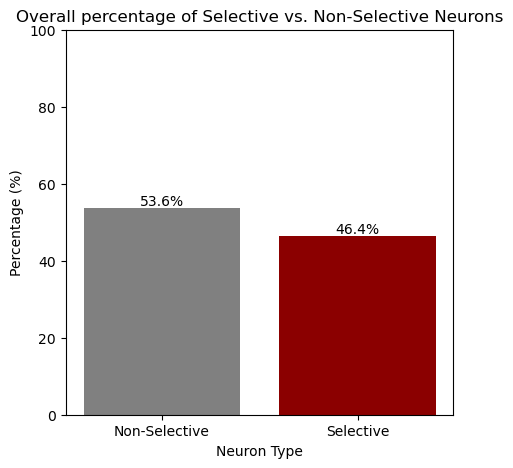

In [2]:
# Calculate percentages
counts = df['selective'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(5, 5))
bars = plt.bar(['Non-Selective', 'Selective'], counts, color=['gray', 'darkred'])

# Add percentage labels on top of bars
for bar, percentage in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Neuron Type')
plt.ylabel('Percentage (%)')
plt.title('Overall percentage of Selective vs. Non-Selective Neurons')
plt.ylim(0, 100)
plt.show()

### Selectivity (AUC) as per the parent region

#### Whisker :

Text(0.5, 1.0, 'Transformed AUC per region for Whisker')

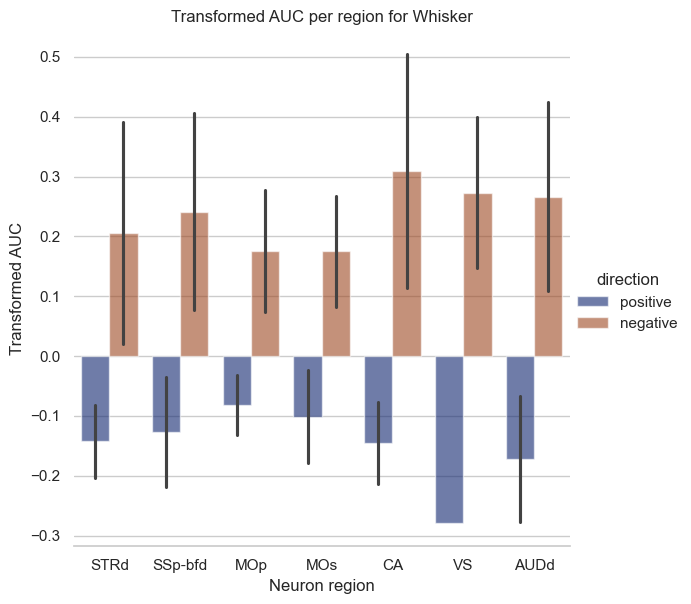

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df[(df['selective']==True) & (df['category']=='whisker')], kind="bar",
    x="ccf_parent_acronym", y="Transformed AUC", hue="direction",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Neuron region", "Transformed AUC")
plt.title("Transformed AUC per region for Whisker")

#### Auditory:

Text(0.5, 1.0, 'Transformed AUC per region for Auditory')

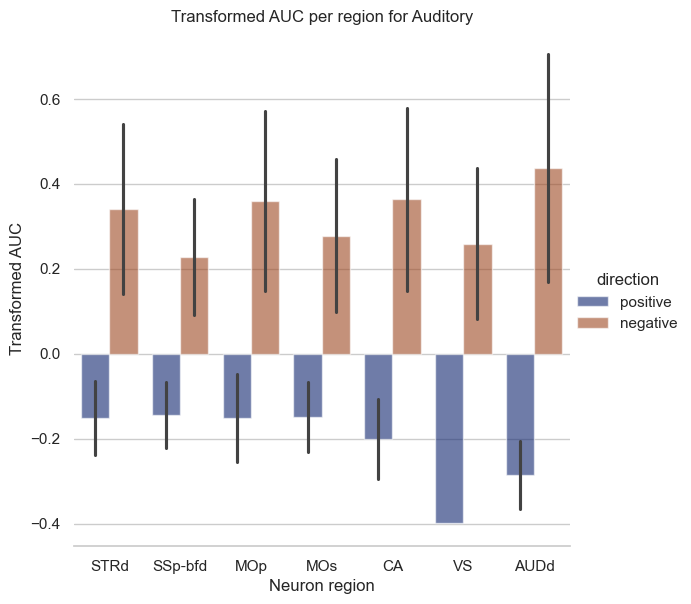

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df[(df['selective']==True) & (df['category']=='auditory')], kind="bar",
    x="ccf_parent_acronym", y="Transformed AUC", hue="direction",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Neuron region", "Transformed AUC")
plt.title("Transformed AUC per region for Auditory")

#### Auditory vs Whisker

Text(0.5, 1.0, 'Transformed AUC per region for Auditory vs Whisker trials')

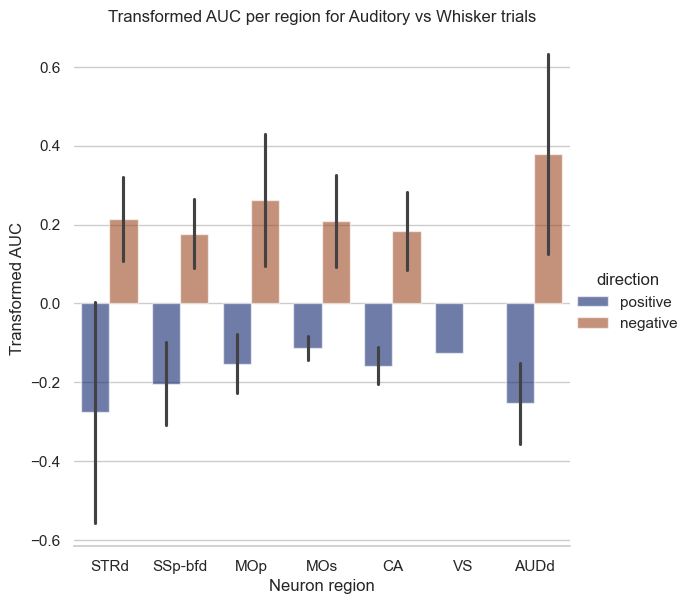

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df[(df['selective']==True) & (df['category']=='wh/aud')], kind="bar",
    x="ccf_parent_acronym", y="Transformed AUC", hue="direction",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Neuron region", "Transformed AUC")
plt.title("Transformed AUC per region for Auditory vs Whisker trials")

#### Whisker trial : Selective number of neurons

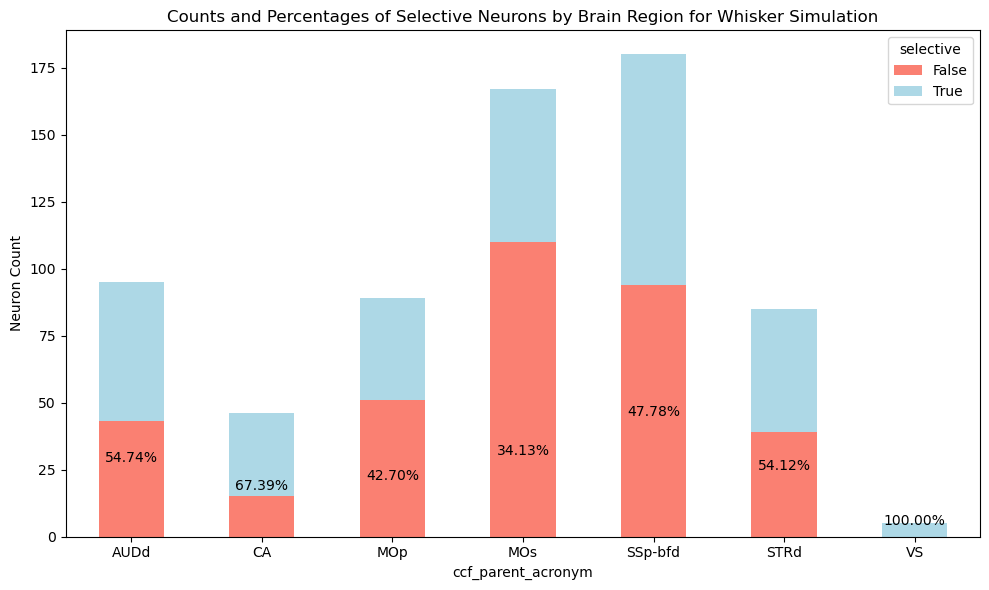

In [ ]:
plot_neuron_counts_with_percentages(df, offset=2, category = 'whisker')

# Utiliser y-axis : pourcentage 
# Stacked bar plots pas la meilleur façon de visualise

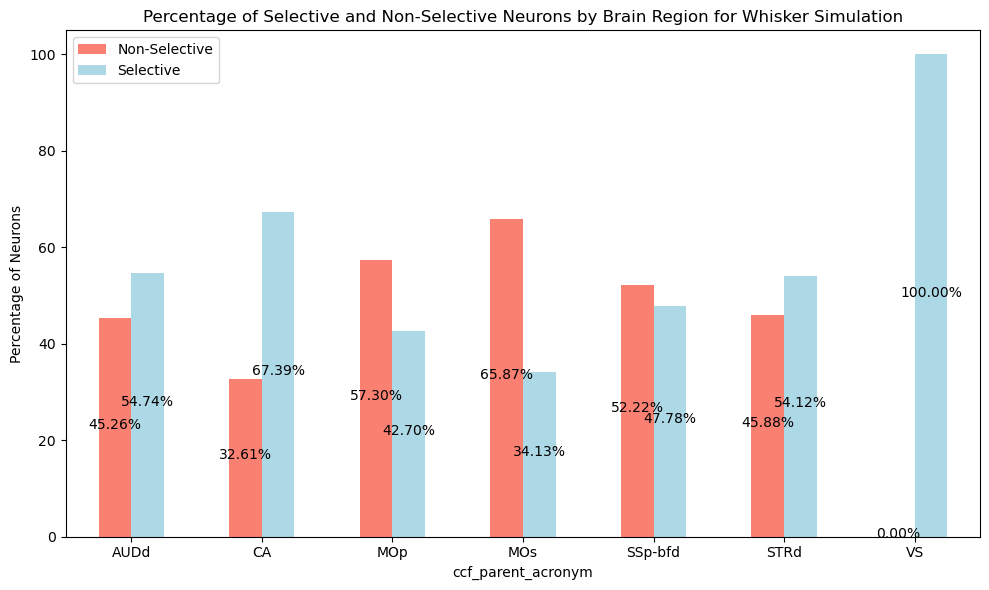

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plot_neuron_percentages(df, offset=2, category = 'whisker')


#### Auditory trial : Selective number of neurons

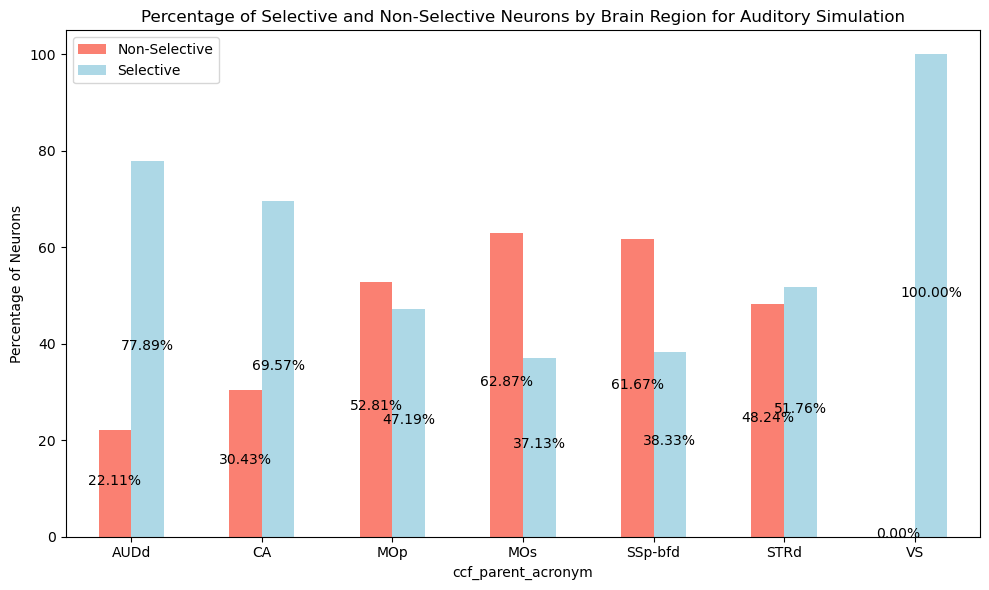

In [ ]:
plot_neuron_percentages(df, offset=2, category = 'auditory')


#### Auditory vs Whisker trial : Selective number of neurons

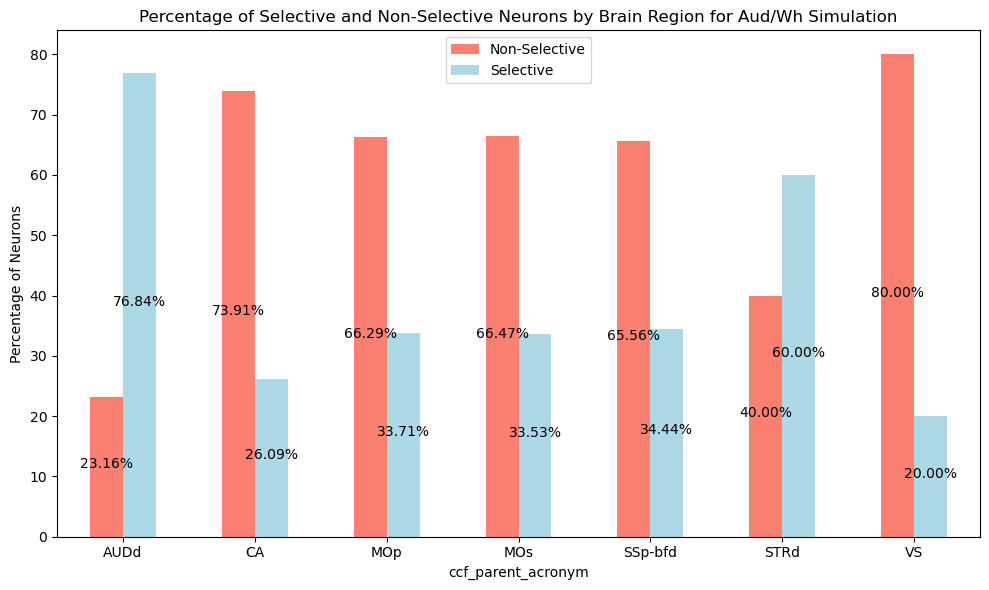

In [ ]:
plot_neuron_percentages(df, offset=2, category = 'wh/aud')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_selective_neuron_percentage(df, offset=2, category='whisker'):
    """
    Plots a bar chart of the percentage of selective neurons in each brain region relative to the total neurons,
    with percentage labels positioned above each bar.

    Parameters:
    - df: DataFrame containing columns 'ccf_parent_acronym' (brain region) and 'selective' (boolean for neuron selectivity).
    - offset: Minimum vertical distance for percentage annotations (default=2).
    - category: Either 'Whisker', 'Auditory', 'Aud/Wh', or 'all'.
    """

    if category != 'all':
        df = df[df['category'] == category]

    # Calculate the count of selective neurons per brain region
    selective_counts = df[df['selective'] == True].groupby('ccf_parent_acronym').size().reset_index(name='Selective_Count')

    # Calculate the total count of neurons per brain region
    total_counts = df.groupby('ccf_parent_acronym').size().reset_index(name='Total_Count')

    # Merge selective and total counts, then calculate the percentage of selective neurons
    percentage_df = selective_counts.merge(total_counts, on='ccf_parent_acronym')
    percentage_df['Percentage'] = (percentage_df['Selective_Count'] / percentage_df['Total_Count']) * 100

    # Generate unique colors for each brain region
    unique_regions = percentage_df['ccf_parent_acronym'].nunique()
    colors = plt.cm.viridis(np.linspace(0, 1, unique_regions))  # Using the 'viridis' colormap

    # Plot the bar chart with unique colors
    ax = percentage_df.plot(
        x='ccf_parent_acronym', y='Percentage', kind='bar', figsize=(10, 6),
        color=colors, legend=False
    )

    # Annotate each bar with its percentage value positioned outside the bar
    for i, (index, row) in enumerate(percentage_df.iterrows()):
        ax.text(
            i, row['Percentage'] + offset,  # Position text above the bar
            f"{row['Percentage']:.2f}%", ha='center', va='bottom', color='black'
        )

    # Customize the plot
    plt.ylabel('Percentage of Selective Neurons')
    plt.title(f'Percentage of Selective Neurons by Brain Region for {category} Simulation')
    plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
    plt.tight_layout()
    plt.show()


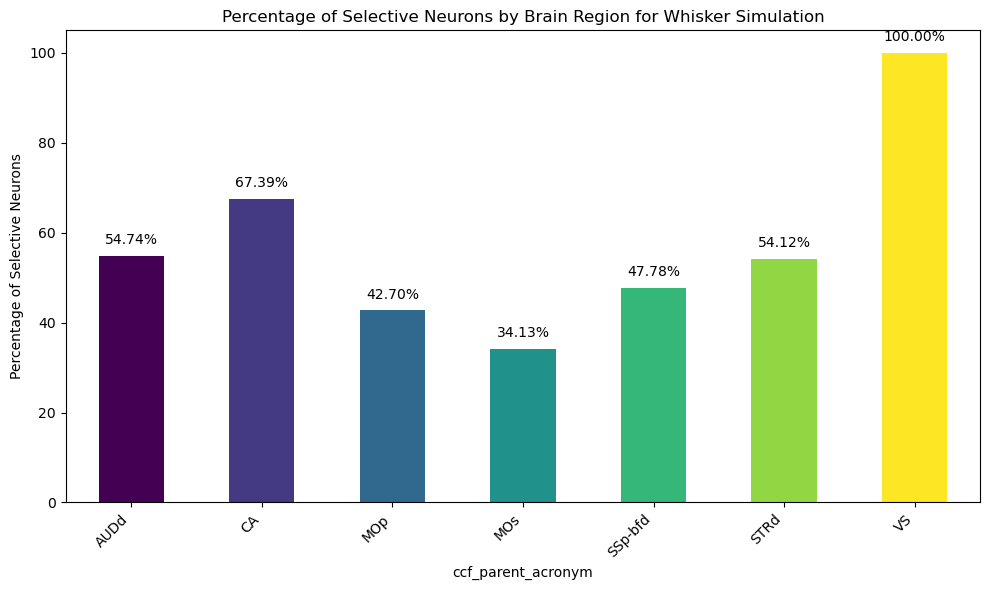

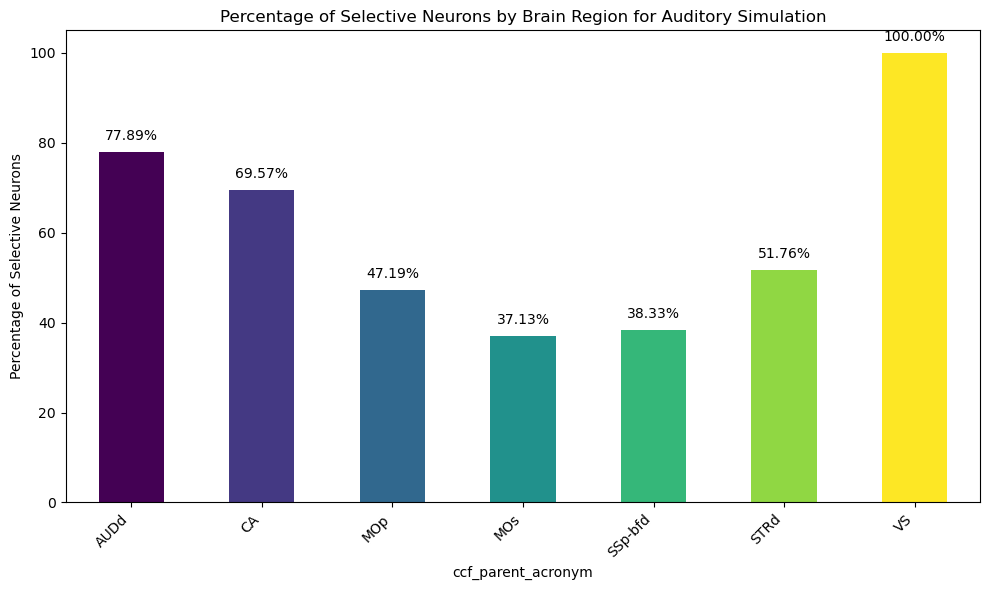

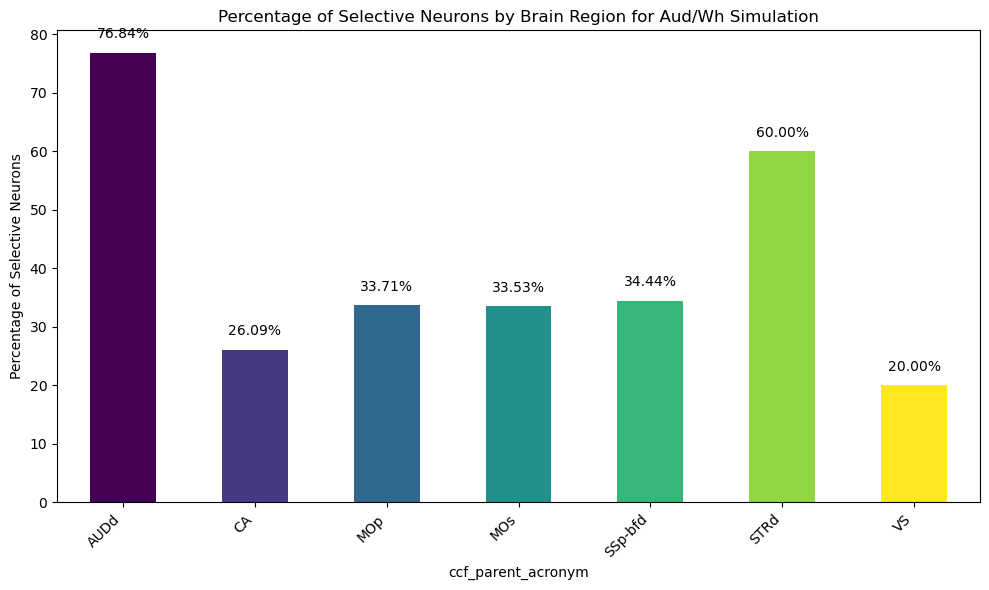

In [ ]:
plot_selective_neuron_percentage(df, offset=2, category='whisker')
plot_selective_neuron_percentage(df, offset=2, category='auditory')
plot_selective_neuron_percentage(df, offset=2, category='wh/aud')